In [1]:
from prophet import Prophet
import pandas as pd 
import datetime 


/home/localhost/time_series_prophet/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [18]:
df = pd.read_csv('data/df_input_volume_dt.csv',usecols=['date','volume'])
df

,date,volume
0,2022-04-27,18439
1,2022-04-28,30694
2,2022-04-29,70496
3,2022-04-30,42129
4,2022-05-01,30
...,...,...
118,2022-08-26,92188
119,2022-08-27,29039
120,2022-08-28,17116
121,2022-08-29,91631


In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.rename(columns={'date':'ds','volume':'y'},inplace=True)

In [21]:
m = Prophet()
m.fit(df)

15:51:00 - cmdstanpy - INFO - Chain [1] start processing
15:51:00 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# m.make_future_dataframe(periods=1)
def prophet_next(df):
   """ Predict the next point in a series """
   m = Prophet()
   m.fit(df)
   future = m.make_future_dataframe(periods=1)
   forecast = m.predict(future)
   return forecast['yhat'].values[0]

prophet_next(df)

15:53:52 - cmdstanpy - INFO - Chain [1] start processing
15:53:52 - cmdstanpy - INFO - Chain [1] done processing


151018.0879224844

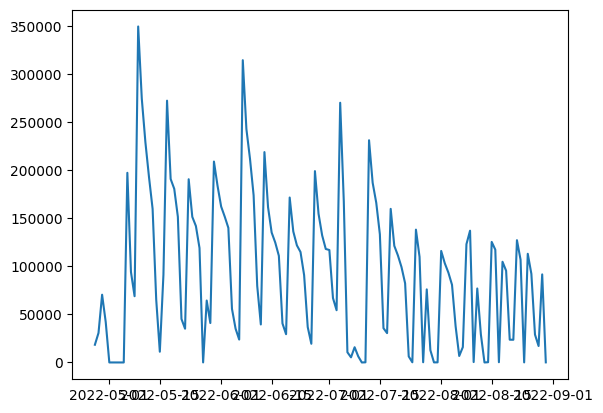

In [31]:
import matplotlib.pyplot as plt
plt.plot(df.ds, df.y)

15:56:19 - cmdstanpy - INFO - Chain [1] start processing
15:56:19 - cmdstanpy - INFO - Chain [1] done processing


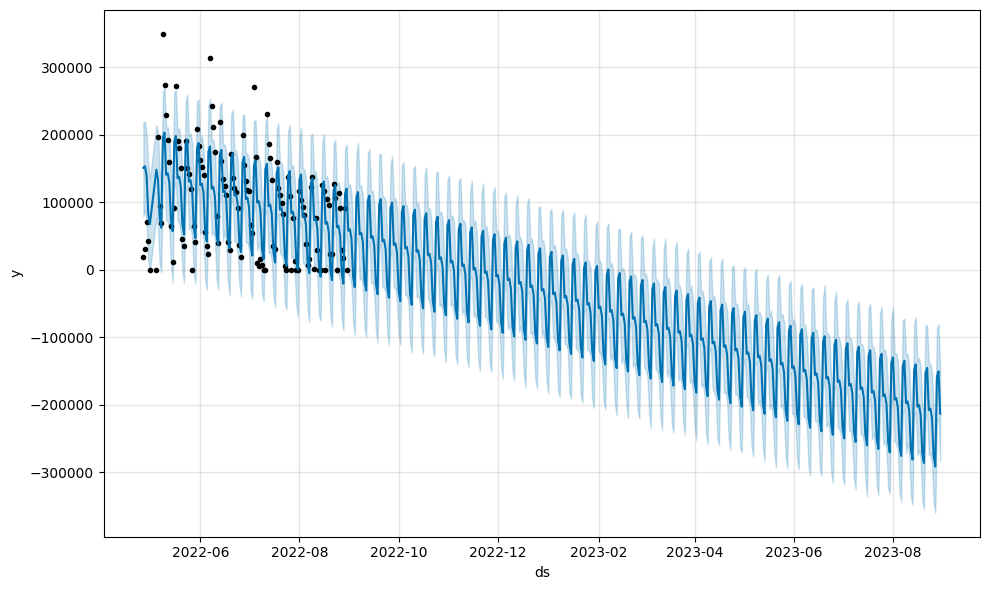

In [32]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

plot = model.plot(forecast)

In [36]:
df = pd.read_csv('data/df_delivery_volume_dt.csv',usecols=['date','volume'])
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'date':'ds','volume':'y'},inplace=True)

15:59:49 - cmdstanpy - INFO - Chain [1] start processing
15:59:49 - cmdstanpy - INFO - Chain [1] done processing


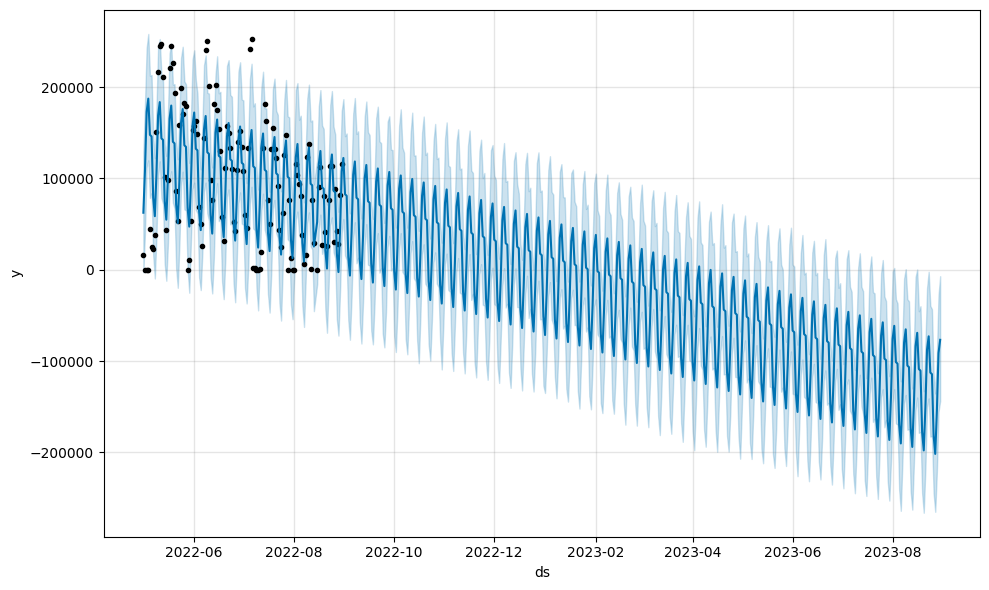

In [38]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

plot = model.plot(forecast)

In [39]:
df = pd.read_csv('data/df_station_volume_dt.csv',usecols=['date','volume'])
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'date':'ds','volume':'y'},inplace=True)

16:01:00 - cmdstanpy - INFO - Chain [1] start processing
16:01:00 - cmdstanpy - INFO - Chain [1] done processing


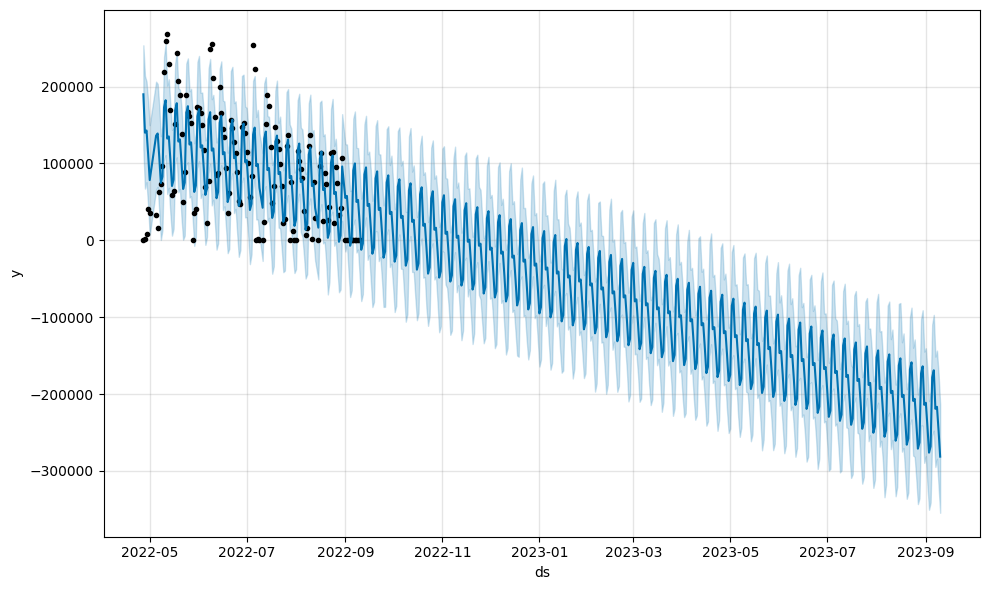

In [41]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

plot = model.plot(forecast)